<a href="https://colab.research.google.com/github/Yashsingh1224/Deep_learning_lab/blob/main/Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [5]:
data = pd.read_csv("/content/drive/MyDrive/Iris.csv")

In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


from matplotlib import pyplot as plt
_df_0['Id'].plot(kind='hist', bins=20, title='Id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['SepalLengthCm'].plot(kind='hist', bins=20, title='SepalLengthCm')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['SepalWidthCm'].plot(kind='hist', bins=20, title='SepalWidthCm')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['PetalLengthCm'].plot(kind='hist', bins=20, title='PetalLengthCm')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Id', y='SepalLengthCm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='SepalWidthCm', y='PetalLengthCm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Id'].plot(kind='line', figsize=(8, 4), title='Id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['SepalLengthCm'].plot(kind='line', figsize=(8, 4), title='SepalLengthCm')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['SepalWidthCm'].plot(kind='line', figsize=(8, 4), title='SepalWidthCm')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['PetalLengthCm'].plot(kind='line', figsize=(8, 4), title='PetalLengthCm')
plt.gca().spines[['top', 'right']].set_visible(False)

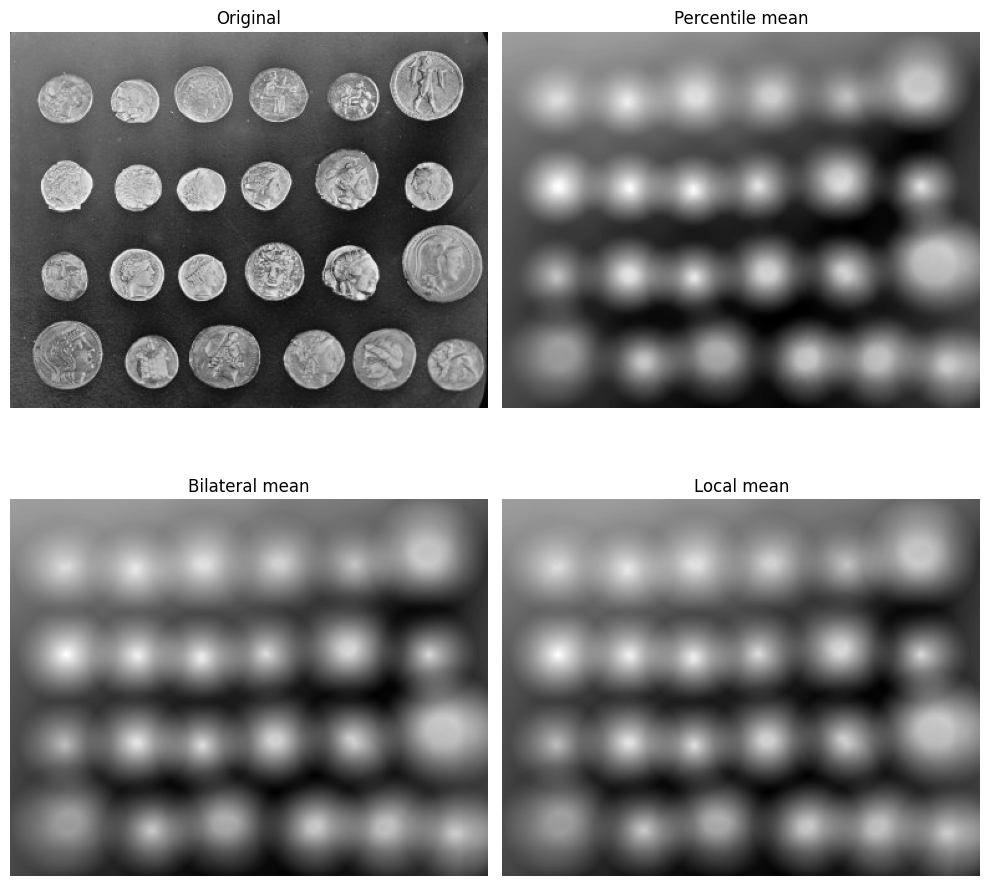

In [1]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.morphology import disk
from skimage.filters import rank


image = data.coins()
footprint = disk(20)

percentile_result = rank.mean_percentile(image, footprint=footprint, p0=0.1, p1=0.9)
bilateral_result = rank.mean_bilateral(image, footprint=footprint, s0=500, s1=500)
normal_result = rank.mean(image, footprint=footprint)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), sharex=True, sharey=True)
ax = axes.ravel()

titles = ['Original', 'Percentile mean', 'Bilateral mean', 'Local mean']
imgs = [image, percentile_result, bilateral_result, normal_result]
for n in range(0, len(imgs)):
    ax[n].imshow(imgs[n], cmap=plt.cm.gray)
    ax[n].set_title(titles[n])
    ax[n].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert
import skimage.io as io

# Invert the horse imag
image = invert(io.imread('/content/drive/MyDrive/sample_img1.jpg'))

# perform skeletonization
skeleton = skeletonize(image)

# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()

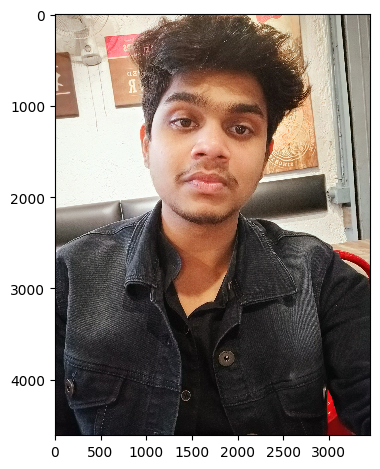

In [1]:
import skimage.io as io
io.imshow('/content/drive/MyDrive/sample_img1.jpg')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io

from skimage import data
from skimage.transform import pyramid_gaussian


image = io.imread('/content/drive/MyDrive/sample_img1.jpg')
rows, cols, dim = image.shape
pyramid = tuple(pyramid_gaussian(image, downscale=2, channel_axis=-1))

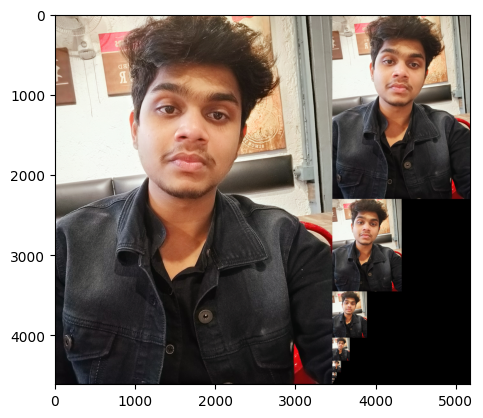

In [3]:
# determine the total number of rows and columns for the composite
composite_rows = max(rows, sum(p.shape[0] for p in pyramid[1:]))
composite_cols = cols + pyramid[1].shape[1]
composite_image = np.zeros((composite_rows, composite_cols, 3), dtype=np.double)

# store the original to the left
composite_image[:rows, :cols, :] = pyramid[0]

# stack all downsampled images in a column to the right of the original
i_row = 0
for p in pyramid[1:]:
    n_rows, n_cols = p.shape[:2]
    composite_image[i_row : i_row + n_rows, cols : cols + n_cols] = p
    i_row += n_rows

fig, ax = plt.subplots()
ax.imshow(composite_image)
plt.show()

In [4]:
def shift_left(xy):
    xy[:, 0] += 50
    return xy

In [5]:
from skimage.transform import warp
warp(image1, shift_left)

array([[[0.75686275, 0.69019608, 0.61960784],
        [0.75686275, 0.69019608, 0.61960784],
        [0.75686275, 0.68627451, 0.63137255],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.74117647, 0.6745098 , 0.60392157],
        [0.74509804, 0.67843137, 0.61568627],
        [0.74117647, 0.67058824, 0.61568627],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.72941176, 0.66666667, 0.60392157],
        [0.72941176, 0.66666667, 0.60392157],
        [0.72941176, 0.65882353, 0.60392157],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.08627451, 0.06666667, 0.08235294],
        [0.07843137, 0.05882353, 0.0745098 ],
        [0.0745098 , 0

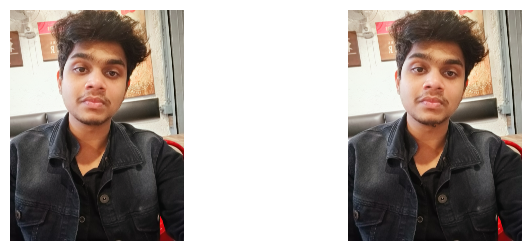

In [9]:
import matplotlib.pyplot as plt
import skimage.io as io
from skimage import data
from skimage.transform import swirl


image1 = io.imread('/content/drive/MyDrive/sample_img1.jpg')
swirled = swirl(image1, rotation=0, strength=10, radius=120)

fig, (ax0, ax1) = plt.subplots(
    nrows=1, ncols=2, figsize=(8, 3), sharex=True, sharey=True
)

ax0.imshow(image, cmap=plt.cm.gray)
ax0.axis('off')
ax1.imshow(swirled, cmap=plt.cm.gray)
ax1.axis('off')

plt.show()

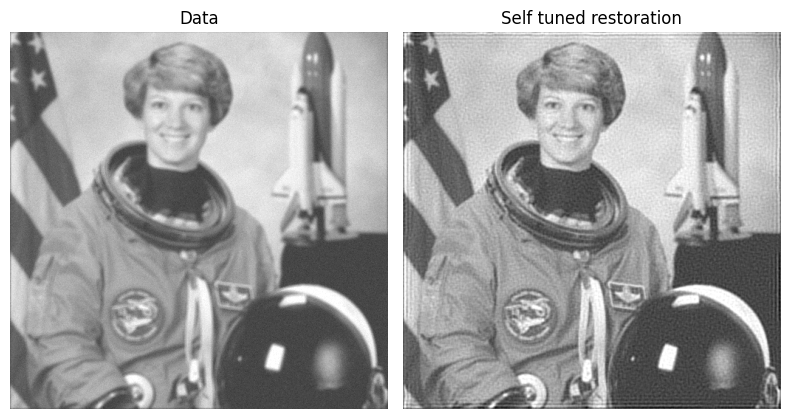

In [12]:
from importlib import import_module
# weiner filter

import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io

from skimage import color, data, restoration

rng = np.random.default_rng()

astro = color.rgb2gray(data.astronaut())
from scipy.signal import convolve2d as conv2

psf = np.ones((5, 5)) / 25
astro = conv2(astro, psf, 'same')
astro += 0.1 * astro.std() * rng.standard_normal(astro.shape)

deconvolved, _ = restoration.unsupervised_wiener(astro, psf)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5), sharex=True, sharey=True)

plt.gray()

ax[0].imshow(astro, vmin=deconvolved.min(), vmax=deconvolved.max())
ax[0].axis('off')
ax[0].set_title('Data')

ax[1].imshow(deconvolved)
ax[1].axis('off')
ax[1].set_title('Self tuned restoration')

fig.tight_layout()

plt.show()

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.ndimage as ndi
import skimage.io as io

import plotly
import plotly.express as px
from skimage import color, data, measure

In [24]:
image = io.imread('/content/drive/MyDrive/sample_img1.jpg')
image = color.rgb2gray(image)

In [26]:
blurred_images = [ndi.uniform_filter(image, size=k) for k in range(2, 32, 2)]
img_stack = np.stack(blurred_images)

fig = px.imshow(
    img_stack,
    animation_frame=0,
    binary_string=True,
    labels={'animation_frame': 'blur strength ~'},
)
plotly.io.show(fig)